In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 12.0
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BookDataset.csv').iloc[:,1:]
df.head()

,Name,Authors,Rating,ISBN,PublishYear,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,no_pages,genre1,genre2,final genre
0,Ramona's World (Ramona Quimby #8),Beverly Cleary,4.11,0688168167,2020,4367,3611,2166,355,97,10596,9,240,Ramona Quimby (Fictitious character),Juvenile Fiction,Humor/Family
1,Ball Complete Book of Home Preserving,Judi Kingry,4.26,0778801314,2020,4180,2563,1210,223,129,8305,123,448,Cooking (Fruit),Cooking (Vegetables),Self-Help
2,Imogene's Antlers,David Small,4.17,037581048X,2020,3392,2328,1410,241,71,7442,222,32,Children's fiction,"Emotions, fiction",Humor/Family
3,Layer Cake,J.J. Connolly,3.99,071563335X,2020,464,614,306,57,20,1461,16,309,NaN,NaN,Suspense/Mystery
4,Tornado,Betsy Byars,3.93,0064420639,2020,426,378,287,71,28,1190,133,64,Children's fiction,"Dogs, fiction",Suspense/Mystery


In [3]:
map_genre = {
    "Humor/Family": "Humor/Family/Romance",
    "Self-Help": "Self-Help",
    "Suspense/Mystery": "Suspense/Mystery",
    "Fantasy/Adventure": "Fantasy/Adventure",
    "Biography/Historical": "Biography/Historical/Memoir",
    "Romance": "Humor/Family/Romance",
    "Horror/Thriller": "Horror/Thriller",
    "Memoir": "Biography/Historical/Memoir",
    "Poetry/Novel": "Miscellaneous",
    "Historical/Fiction": "Biography/Historical/Memoir",
    "Novel": "Miscellaneous",
    "Non-Fiction": "Miscellaneous",
    "Folklore": "Fantasy/Adventure",
    "Travel": "Biography/Historical/Memoir",
    "Adventure": "Fantasy/Adventure",
    "Novel/Feminism": "Miscellaneous",
    "Historical/Family": "Biography/Historical/Memoir",
    "Children's/Humor": "Humor/Family/Romance",
    "Magical Realism/Historical": "Biography/Historical/Memoir",
    "Fantasy/Horror": "Fantasy/Adventure",
    "Political/Dystopian": "Fantasy/Adventure",
    "Self-help/Management": "Self-Help",
    "Historical/Adventure": "Fantasy/Adventure",
    "Thriller/Suspense": "Suspense/Mystery",
    "War/Romance": "Miscellaneous",
    "Science fiction/Adventure": "Fantasy/Adventure",
    "Literary fiction/Humor": "Humor/Family/Romance",
    "Adventure/Travel": "Biography/Historical/Memoir",
    "Philosophy/Nature": "Miscellaneous",
    "Satirical/War": "Miscellaneous",
    "Existential/Philosophical": "Miscellaneous",
    "Fantasy/Humor": "Fantasy/Adventure",
    "Mystery/Suspense": "Suspense/Mystery",
    "Thriller/Adventure": "Fantasy/Adventure",
    "Family/Humor": "Humor/Family/Romance",
    "Adventure/Fantasy": "Fantasy/Adventure",
    "Science Fiction/Thriller": "Fantasy/Adventure",
    "Science Fiction/Adventure": "Fantasy/Adventure",
    "Fantasy/Romance": "Fantasy/Adventure",
    "Science Fiction/Humor": "Fantasy/Adventure",
    "Thriller/Mystery": "Suspense/Mystery",
    "Horror/Suspense": "Horror/Thriller",
    "Non-fiction": "Miscellaneous",
    "Fiction": "Miscellaneous",
    "Non-fiction/Historical": "Biography/Historical/Memoir",
    "Philosophy": "Miscellaneous",
    "Cookbook": "Miscellaneous"
}
for key, value in map_genre.items():
    df.loc[df["final genre"] == key, "final genre"] = value
    
df['rating_level'] = pd.cut(df['Rating'],bins=5,labels=[1,2,3,4,5])


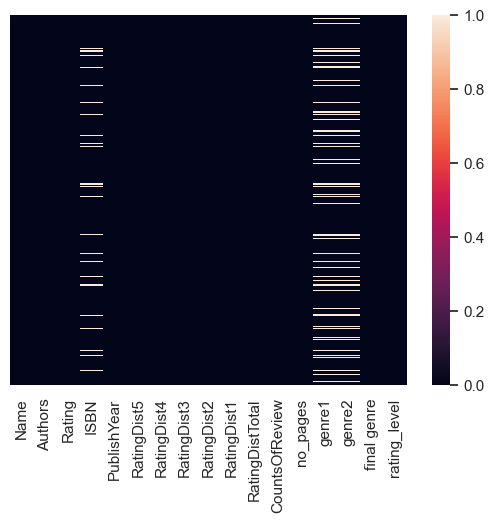

In [4]:
# missing values
def show_missing_values(df):
    sns.heatmap(df.isnull(),yticklabels=False)
    plt.show()
    
show_missing_values(df)

In [5]:
# average rating (decade-wise)

d80 = df[df.PublishYear.isin(list(range(1980,1990)))]
d90 = df[df.PublishYear.isin(list(range(1990,2000)))]
d00 = df[df.PublishYear.isin(list(range(2000,2010)))]
d10 = df[df.PublishYear.isin(list(range(2010,2021)))]

def plot_rating_distribution_by_year():
    fig,ax = plt.subplots(2,2,figsize=(12,8))
    sns.distplot(d80['Rating'],ax=ax[0,0],color='red')
    sns.distplot(d90['Rating'],ax=ax[0,1],color='orange')
    sns.distplot(d00['Rating'],ax=ax[1,0],color='green')
    sns.distplot(d10['Rating'],ax=ax[1,1],color='blue')

    for i,j in zip(["1980s","1990s","2000s","2010s"],[[0,0],[0,1],[1,0],[1,1]]):
        ax[j[0],j[1]].set_xlabel('Average rating',fontsize=12)
        ax[j[0],j[1]].set_ylabel(f'Book Density - {i}',fontsize=12)

    plt.show()
    

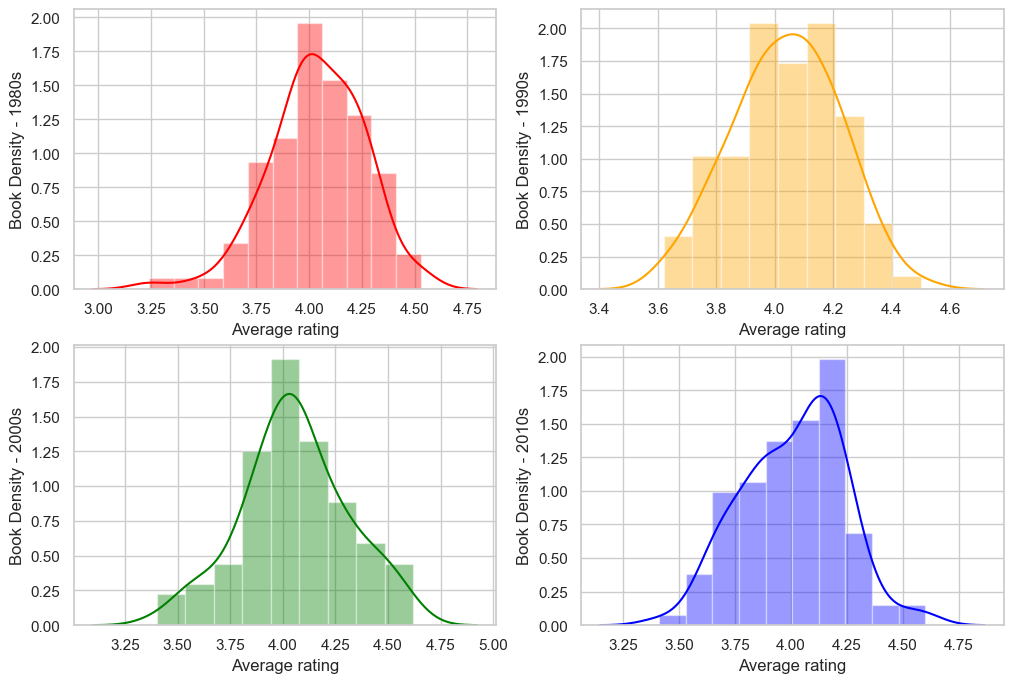

In [6]:
plot_rating_distribution_by_year()

In [7]:
df['final genre'].value_counts()

Fantasy/Adventure              101
Humor/Family/Romance            84
Biography/Historical/Memoir     81
Miscellaneous                   57
Suspense/Mystery                42
Self-Help                       29
Horror/Thriller                 16
Name: final genre, dtype: int64

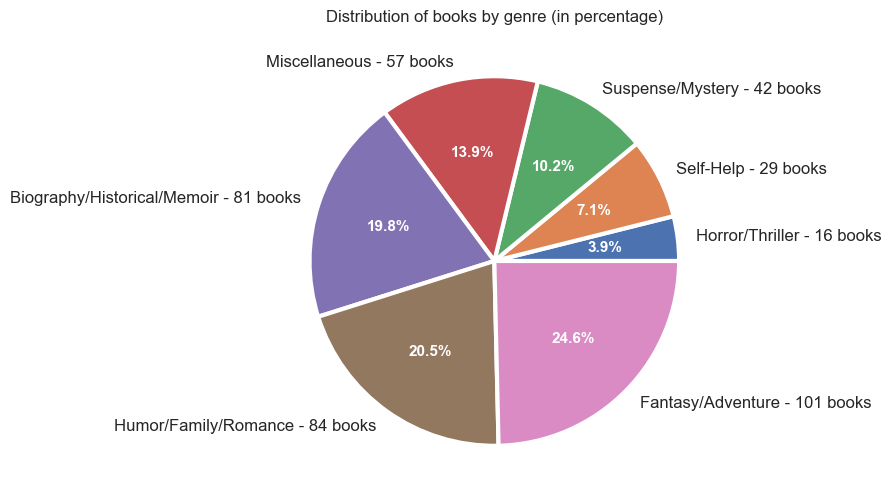

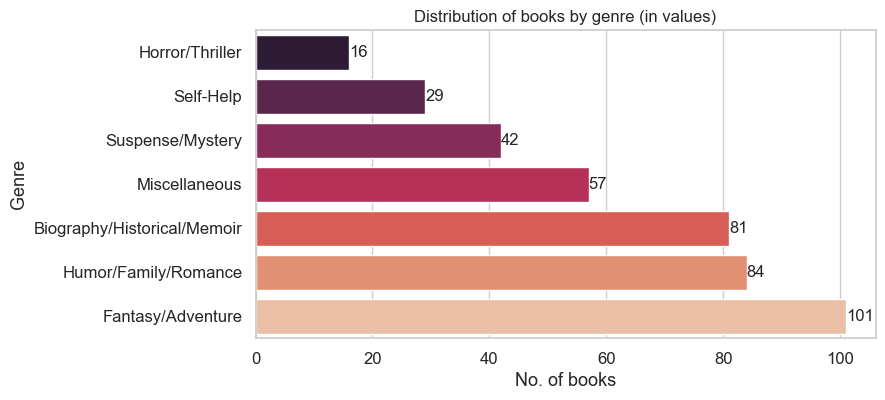

In [8]:
# Genre-wise distribution of books (overall)


genre_dist = df.groupby('final genre')['Name'].size().reset_index().sort_values(by='Name')
genre_rating = df.groupby('final genre')['Rating','RatingDistTotal'].agg({'Rating':'mean','RatingDistTotal':'sum'}).reset_index().sort_values(by='Rating',ascending=False)


def genre_wise_distribution_plots():
    fig= plt.subplots(figsize=(6,6))
    patches, texts, autotexts = plt.pie(x=genre_dist['Name'],
            labels=genre_dist['final genre']+" - "+genre_dist['Name'].astype(str)+ " books",
            wedgeprops = {'linewidth': 3},
            autopct='%1.1f%%',      
            )
    plt.title("Distribution of books by genre (in percentage)")
    for i in range(len(texts)):
        texts[i].set_fontsize(12)
        autotexts[i].set_fontsize(11)
        autotexts[i].set_color('white')
        autotexts[i].set_fontweight('bold')


    fig= plt.subplots(figsize=(8,4))
    splot = sns.barplot(data=genre_dist,
                y='final genre', 
                x='Name', 
                palette="rocket", 
                )
    plt.bar_label(splot.containers[0],fontsize=12)

    plt.xlabel('No. of books', fontsize=13);
    plt.ylabel('Genre', fontsize=13);
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.title("Distribution of books by genre (in values)")
    plt.show()


genre_wise_distribution_plots()





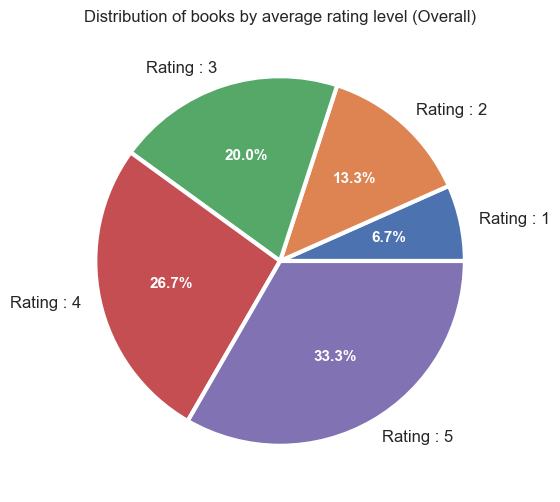

In [9]:
# Rating distribution (overall)
rating_ovr = df.groupby('rating_level').size().reset_index().rename(columns={0:'count'})

def overall_rating_distribution():
    fig= plt.subplots(figsize=(6,6))
    patches, texts, autotexts = \
            plt.pie(x=rating_ovr['rating_level'],
            labels="Rating : "+rating_ovr['rating_level'].astype(str),
            wedgeprops = {'linewidth': 3},
            autopct='%1.1f%%',      
            )
    plt.title("Distribution of books by average rating level (Overall)")
    for i in range(len(texts)):
        texts[i].set_fontsize(12)
        autotexts[i].set_fontsize(11)
        autotexts[i].set_color('white')
        autotexts[i].set_fontweight('bold')
    plt.show()

overall_rating_distribution()

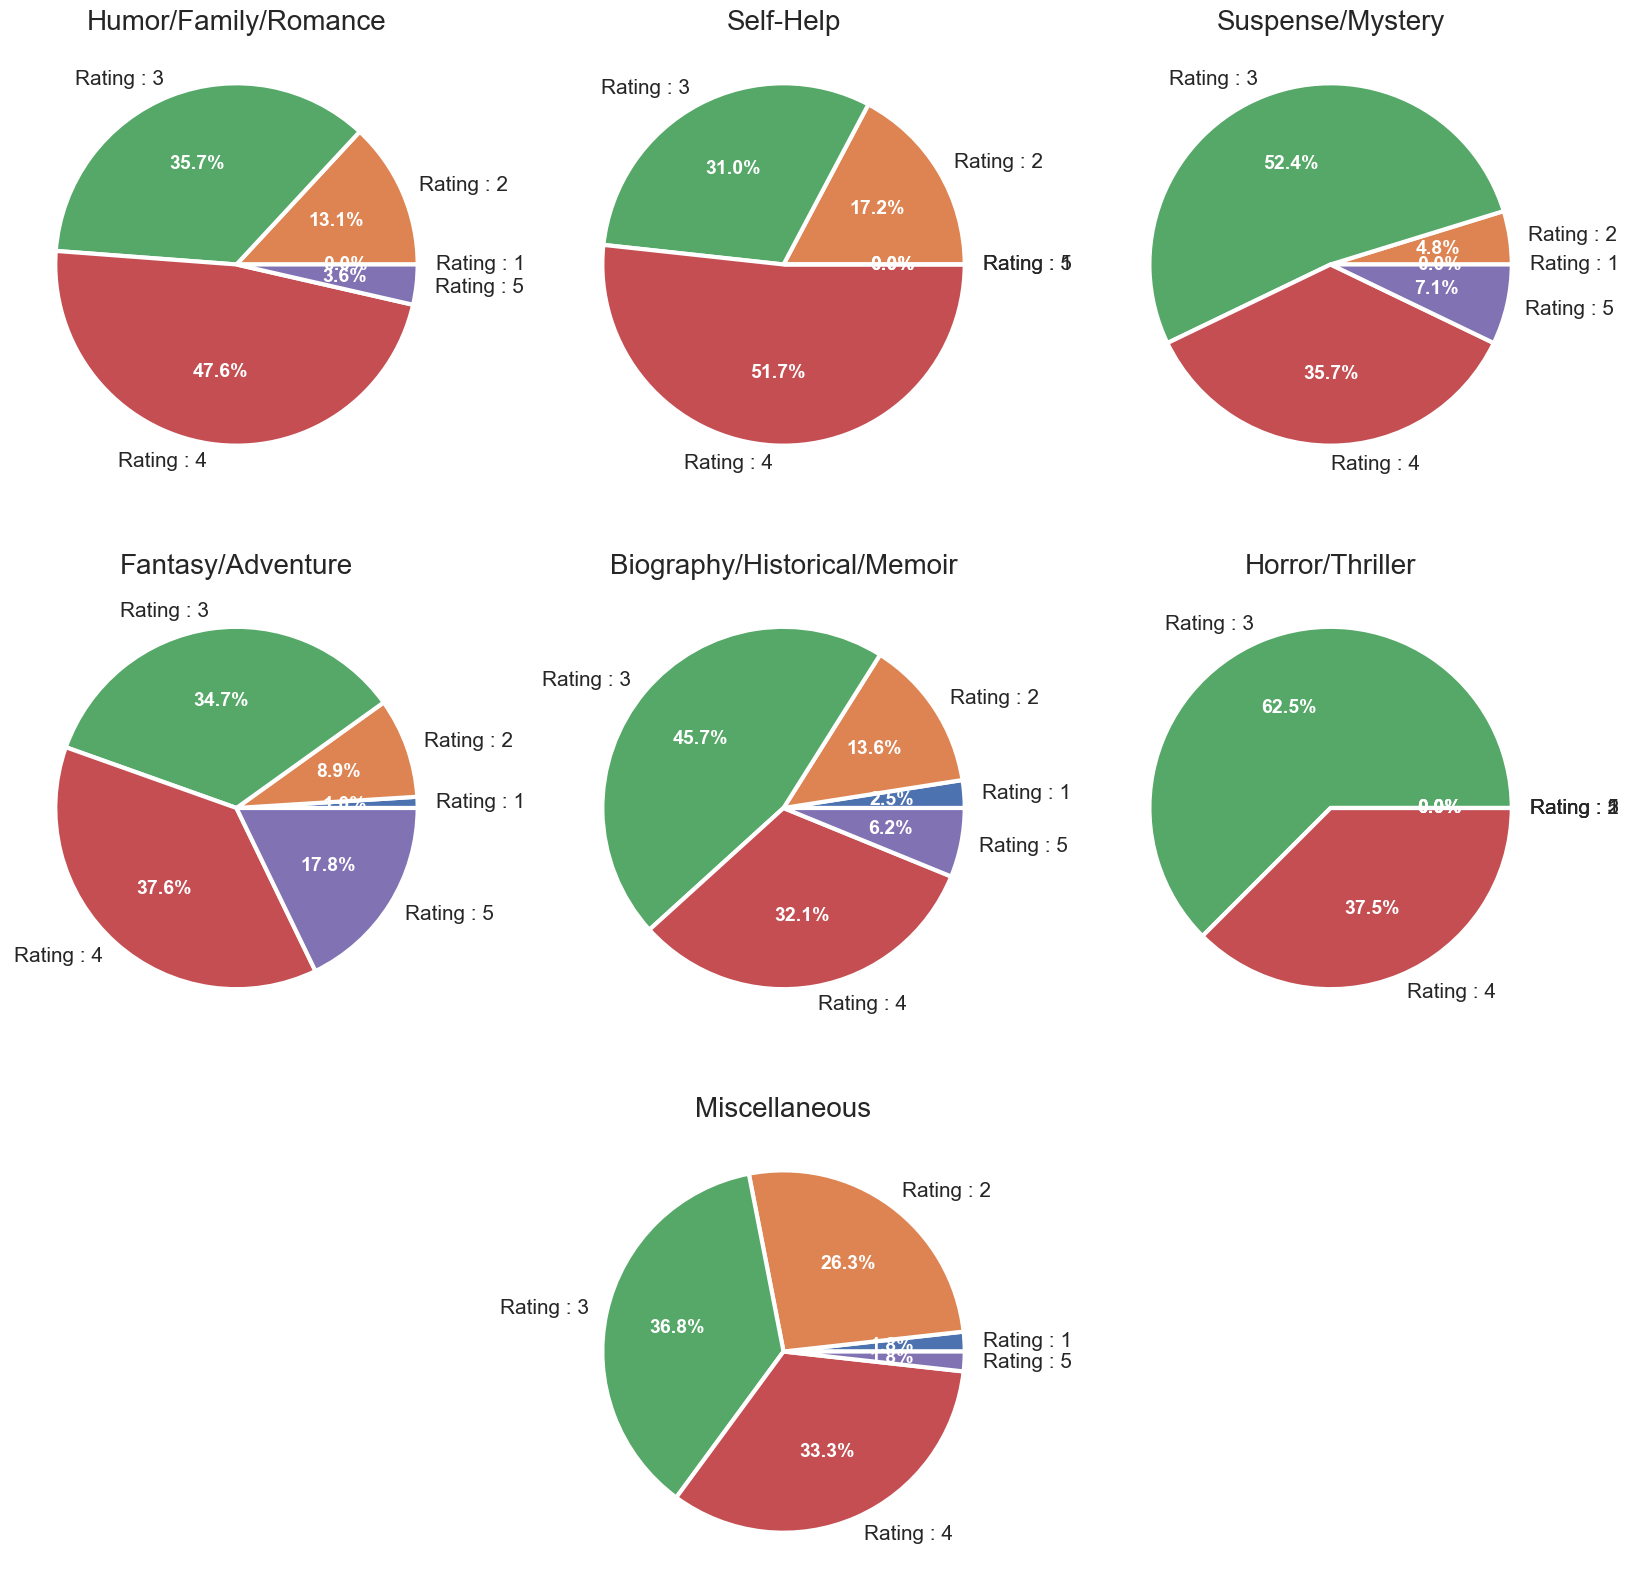

In [10]:
# Rating distribution (genre-wise)   
def genre_wise_rating_distribution():
    fig,ax = plt.subplots(3,3,figsize=(20,20))

    for genre,ax_ in zip(df['final genre'].unique(),
                         [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,1]]):
        temp = df[df['final genre']==genre]
        rating_genre = temp.groupby('rating_level').size().reset_index().rename(columns={0:'count'})
#         rating_genre = rating_genre[rating_genre['count']>0]
        patches, texts, autotexts = ax[ax_[0],ax_[1]].pie( x=rating_genre['count'],
                                                           labels="Rating : "+rating_genre['rating_level'].astype(str),
                                                           wedgeprops = {'linewidth': 3},
                                                           autopct='%.1f%%',      
                                                          )
        ax[ax_[0],ax_[1]].set_title(genre,fontsize=20)
        for i in range(len(texts)):
            texts[i].set_fontsize(15)
            autotexts[i].set_fontsize(14)
            autotexts[i].set_color('white')
            autotexts[i].set_fontweight('bold')


    fig.delaxes(ax[2][0])
    fig.delaxes(ax[2][2])
    plt.show()
    
genre_wise_rating_distribution()

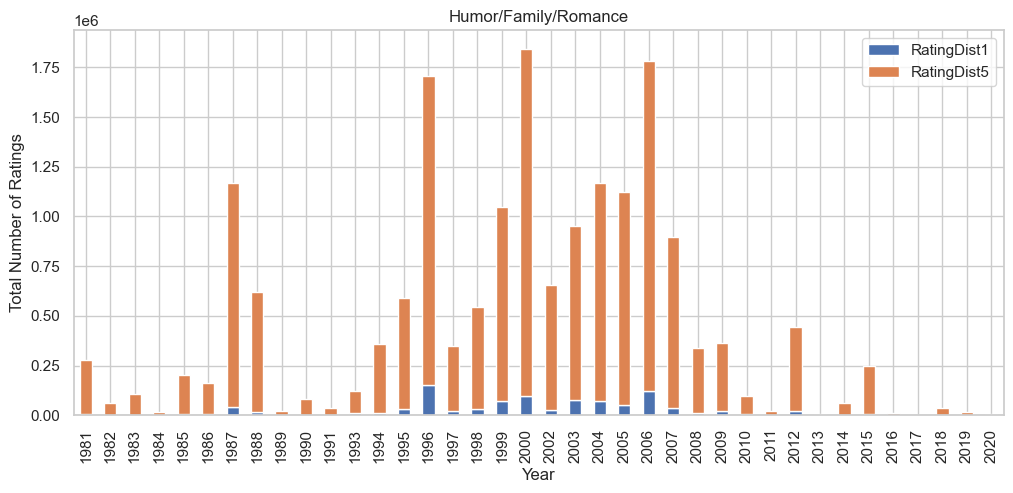

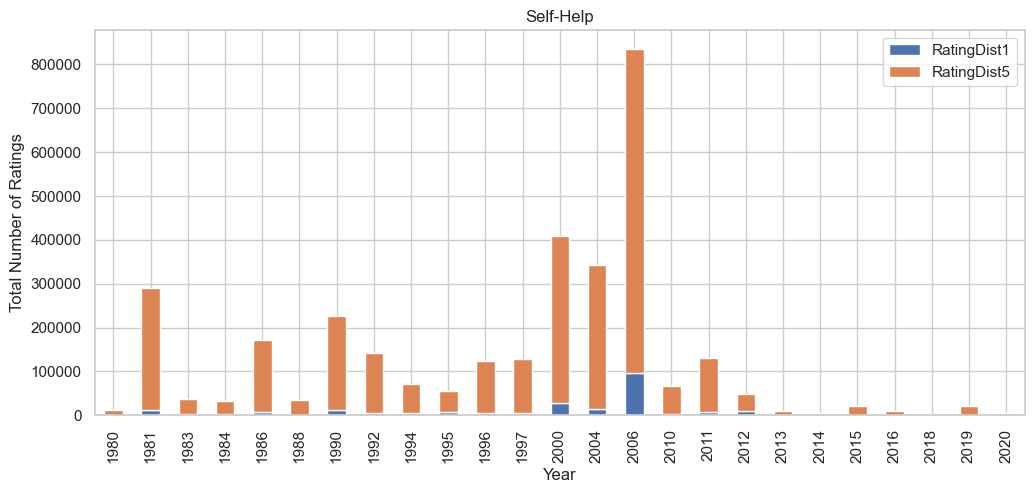

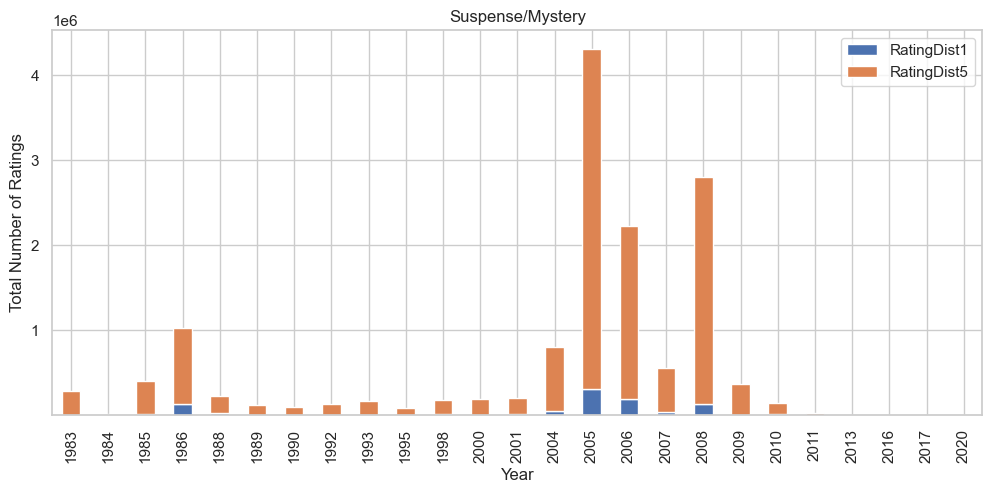

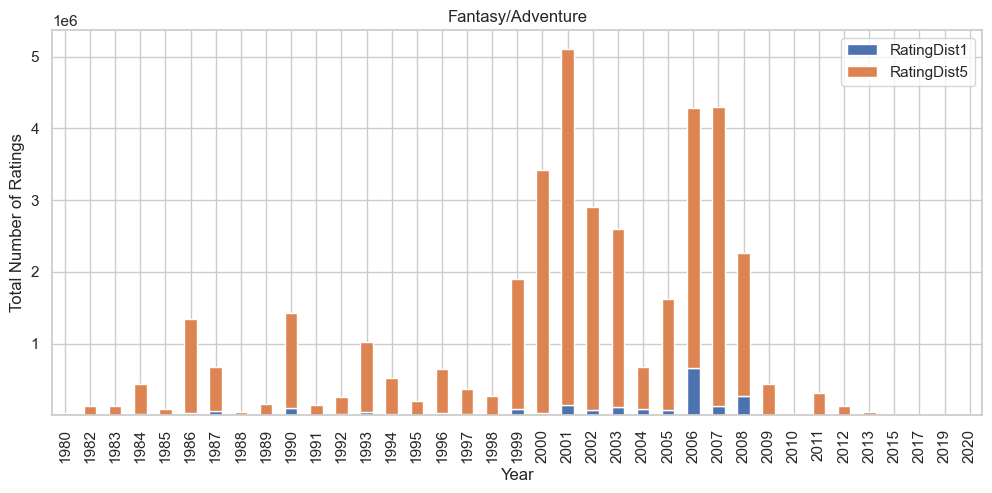

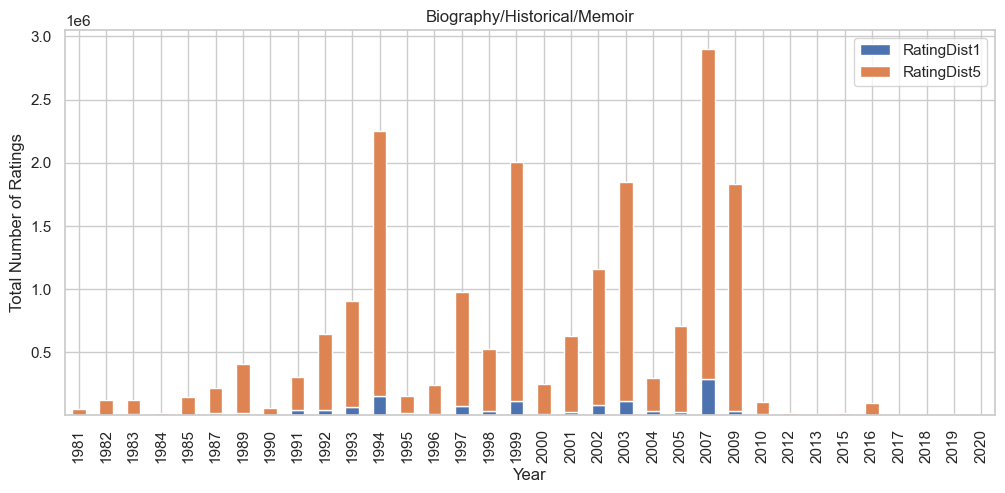

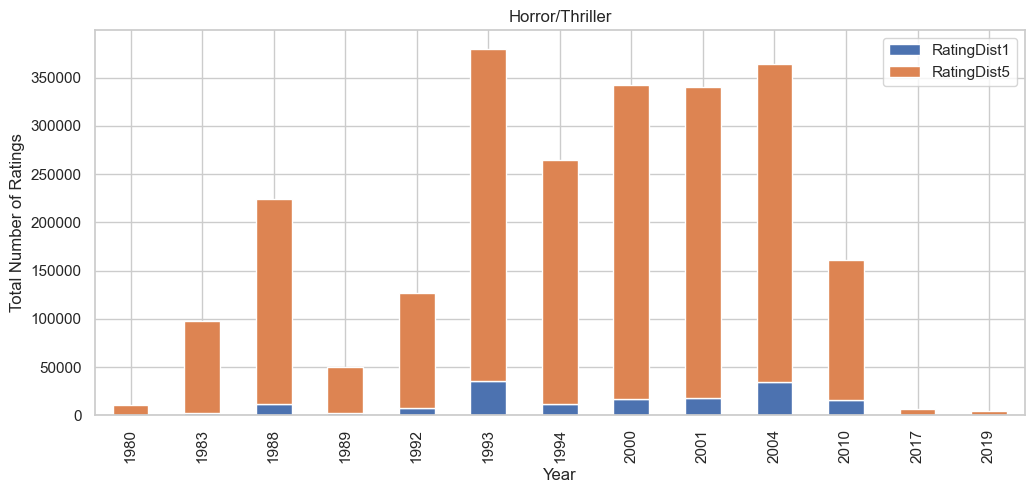

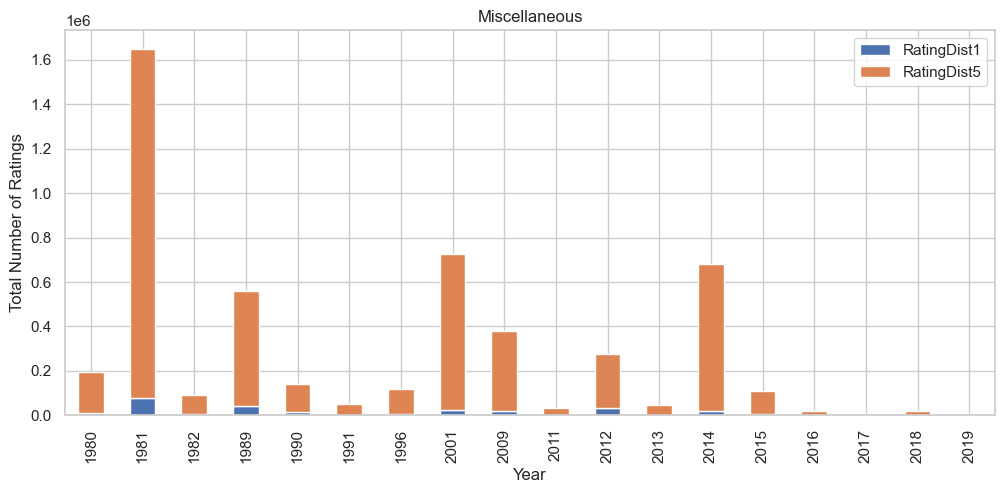

In [13]:
# 1 star vs 5 star ratings across the years (genre-wise)
def onestar_fivestar_rating():
    for genre in df['final genre'].unique():
        temp = df[df['final genre']==genre]
        df_sum = temp.groupby('PublishYear').sum()[['RatingDist1','RatingDist5']]

        fig,ax = plt.subplots(figsize=(12,5))
        df_sum.plot(kind='bar', stacked=True,ax=ax)
        ax.set_title(f'{genre}')

        plt.xlabel('Year')
        plt.ylabel('Total Number of Ratings')

        plt.show()
        
onestar_fivestar_rating()

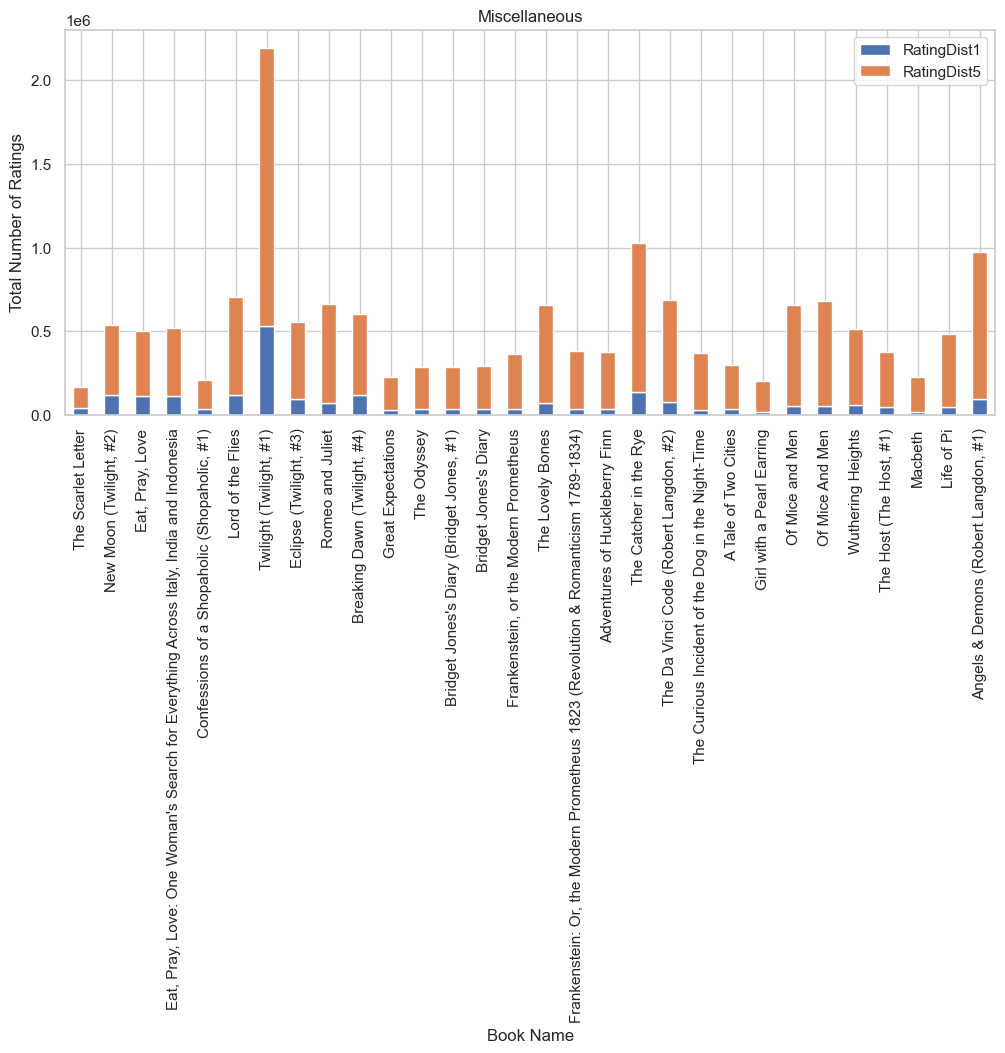

In [12]:
# analysing the top 20 popular controversial books
# popularity criteria : >600,000 ratings)
# controversial book criteria: abs difference between (1-star + 2-star) and (5-star) ratings percentage distribution should be low


temp = df[df.RatingDistTotal>600000][['Name','PublishYear','Rating','RatingDist1','RatingDist2','RatingDist3','RatingDist4','RatingDist5','RatingDistTotal']]
temp['%_low'] = (temp['RatingDist1']+temp['RatingDist2'])*100/temp['RatingDistTotal']
temp['%_high'] = (temp['RatingDist5'])*100/temp['RatingDistTotal']
temp['diff'] = np.abs((temp['%_high']-temp['%_low'])).round(1)

temp = temp.sort_values(by=['diff'],
                 ascending=[True]).head(30).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(12,5))
temp.plot(x = 'Name',
          y=['RatingDist1','RatingDist5'], 
          kind='bar', stacked=True,ax=ax)
ax.set_title(f'{genre}')

plt.xlabel('Book Name')
plt.xticks(rotation=90)

plt.ylabel('Total Number of Ratings')

plt.show()